## Gem Price Prediction (NN implementation of regression)

In [2]:
import sys
sys.path.append("/media/data/anaconda3/envs/upgrad/lib/python3.8/site-packages/")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# %pip install --upgrade pip
# %pip install tensorflow==2.6
# restart kernel

     |████████████████████████████████| 1.6 MB 1.4 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.1.2
    Uninstalling pip-21.1.2:
      Successfully uninstalled pip-21.1.2
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 458.3 MB 52 kB/s  eta 0:00:011     |████████▎                       | 118.9 MB 10.8 MB/s eta 0:00:32     |████████████▊                   | 182.5 MB 8.8 MB/s eta 0:00:32     |███████████████████████████▍    | 392.9 MB 12.6 MB/s eta 0:00:06     |███████████████████████████▊    | 396.5 MB 14.4 MB/s eta 0:00:05     |██████████████████████████████  | 428.1 MB 9.9 MB/s eta 0:00:04
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl (14.8 MB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
     |████████████████████████████████| 4.

    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.0
    Uninstalling Keras-2.3.0:
      Successfully uninstalled Keras-2.3.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip freeze | grep tensorflow

tensorflow==2.6.0
tensorflow-estimator==2.6.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import tensorflow as tf

ModuleNotFoundError: No module named 'seaborn'

In [7]:
tf.__version__

'2.5.0'

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("../data/fake_reg.csv")

### Visualize

In [10]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


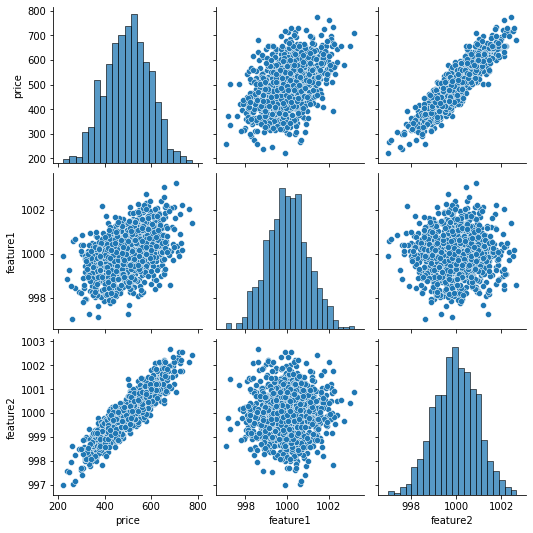

In [11]:
sns.pairplot(df)

### Split data 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[['feature1', 'feature2']].values

In [14]:
y = df['price'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
X_train.shape

(700, 2)

In [17]:
X_test.shape

(300, 2)

### Transform data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), de

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
X_train = scaler.transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [25]:
X_train.max(), X_train.min()

(1.0, 0.0)

### Train a neural network

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [28]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))
          
model.compile(optimizer='rmsprop', loss='mse') 

In [29]:
model.fit(x= X_train,y= y_train, epochs=250, workers=-1)

Epoch 1/250
22/22 [==============================] - 2s 3ms/step - loss: 256554.7656
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256384.5938
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256203.0469
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 255998.4531
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255770.5312
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255514.9219
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255232.7031
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 254921.2969
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254580.1094
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254206.8281
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 253798.8750
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 1ms/step - loss: 58.2790
Epoch 194/250
22/22 [==============================] - 0s 1ms/step - loss: 54.5774
Epoch 195/250
22/22 [==============================] - 0s 1ms/step - loss: 51.0262
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 47.7479
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 44.8410
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 41.6848
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 39.5167
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 37.4254
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 35.8411
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 34.3054
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 32.6350
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 31.1772
Epoch 205/250
22/2

In [30]:
loss_df = pd.DataFrame(model.history.history)

In [31]:
loss_df.head()

,loss
0,256554.765625
1,256384.593750
2,256203.046875
3,255998.453125
4,255770.531250


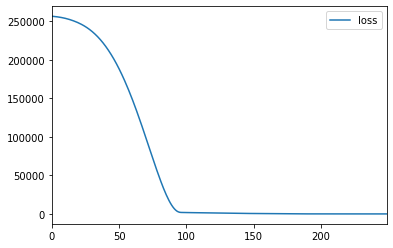

In [32]:
loss_df.plot()

### Evaluate model

In [33]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 633us/step - loss: 24.9433


24.943328857421875

In [34]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 617us/step - loss: 23.8763


23.8763427734375

## Predict on test set

In [35]:
test_predictions = model.predict(X_test)

In [36]:
test_predictions[:5]

array([[405.23807],
       [623.47723],
       [592.06354],
       [572.1834 ],
       [366.59955]], dtype=float32)

In [37]:
len(X_test), len(test_predictions)

(300, 300)

In [38]:
test_predicitions = pd.Series(test_predictions.reshape(300,))

In [39]:
test_predicitions.shape, y_test.shape

((300,), (300,))

In [40]:
pred_df = pd.DataFrame(y_test, columns=['True Y'])
pred_df['Pred Y'] = test_predictions

In [41]:
pred_df.head()

,True Y,Pred Y
0,402.296319,405.238068
1,624.156198,623.477234
2,582.455066,592.063538
3,578.588606,572.183411
4,371.224104,366.599548


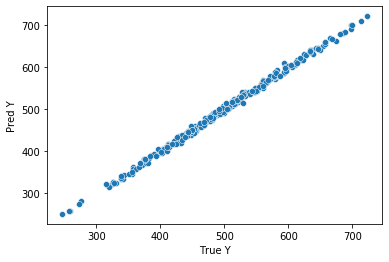

In [42]:
sns.scatterplot(data=pred_df, x='True Y', y='Pred Y')

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [44]:
mean_absolute_error(pred_df['True Y'], pred_df['Pred Y'])

3.9997306406875714

In [45]:
mean_squared_error(pred_df['True Y'], pred_df['Pred Y']) ** 0.5

4.994329804095452

In [46]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [70]:
new_gem = [[998,1000]]
new_gem = scaler.transform(new_gem)

In [72]:
new_gem

array([[0.14117652, 0.53968792]])

In [73]:
model.predict(new_gem)

array([[419.66476]], dtype=float32)

### Save and retrieve model

In [74]:
from tensorflow.keras.models import load_model

In [75]:
model.save("my_gem.h5")

In [77]:
loaded_model = load_model("my_gem.h5")

In [78]:
loaded_model.predict(new_gem)

array([[419.66476]], dtype=float32)